In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import pandas as pd
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import gzip
import os
import requests
from anndata import AnnData
import scanpy as sc
from scipy import stats
import copy
import pickle
seed=314159
device='cuda'
from GPerturb import *

# SAMS-VAE vs GPerturb perturbation effects on Exosome-related perturbation, Replogle et al

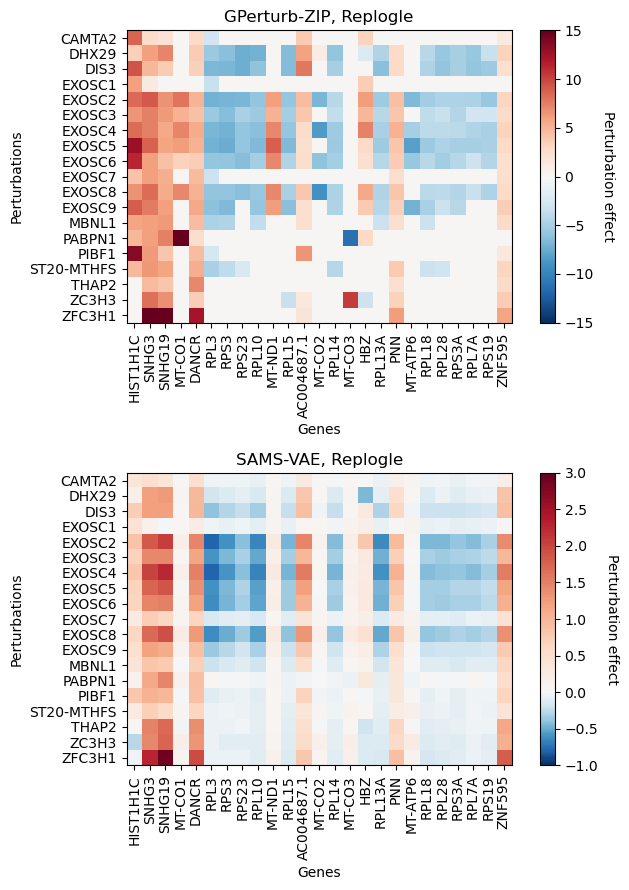

In [12]:
SAMS_pert = pd.read_csv('./GPerturb_vis_data/Rep_SAMS_subset.csv', index_col=0)
GPerturb_pert = pd.read_csv('./GPerturb_vis_data/Rep_ZIP_subset.csv', index_col=0)

import matplotlib.colors as colors

fig2, axes2 = plt.subplots(2, 1)
negatives = -15 
positives = 15 
num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

im = axes2[0].imshow(GPerturb_pert, cmap=cmap_2neg_4pos, vmin=negatives, vmax=positives)
axes2[0].set_xticks(np.arange(len(GPerturb_pert.columns)), GPerturb_pert.columns, rotation=90)
axes2[0].set_yticks(np.arange(len(GPerturb_pert.index)), GPerturb_pert.index)
axes2[0].set_ylabel('')
axes2[0].set_xlabel('Genes')
axes2[0].set_ylabel('Perturbations')
axes2[0].set_title('GPerturb-ZIP, Replogle')
axes2[0].set_aspect('equal')
cbar = fig2.colorbar(im, ax=axes2[0], fraction=0.04)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Perturbation effect', rotation=270)


negatives = -1 
positives = 3 
num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

im = axes2[1].imshow(SAMS_pert, cmap=cmap_2neg_4pos, vmin=negatives, vmax=positives)
axes2[1].set_xticks(np.arange(len(SAMS_pert.columns)), SAMS_pert.columns, rotation=90)
axes2[1].set_yticks(np.arange(len(SAMS_pert.index)), SAMS_pert.index)
# axes2.set_xticks([])
# axes2.set_yticks([])
axes2[1].set_ylabel('')
axes2[1].set_xlabel('Genes')
axes2[1].set_ylabel('Perturbations')
axes2[1].set_title('SAMS-VAE, Replogle')
axes2[1].set_aspect('equal')
cbar = fig2.colorbar(im, ax=axes2[1], fraction=0.04)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Perturbation effect', rotation=270)


fig2.set_size_inches(7, 9)
fig2.tight_layout()
plt.savefig('rep_heatmap_exo_GPerturb_vs_SAMS.png')
# plt.close()

# GEARS vs GPerturb perturbation effects on Exosome-related perturbation, Replogle et al

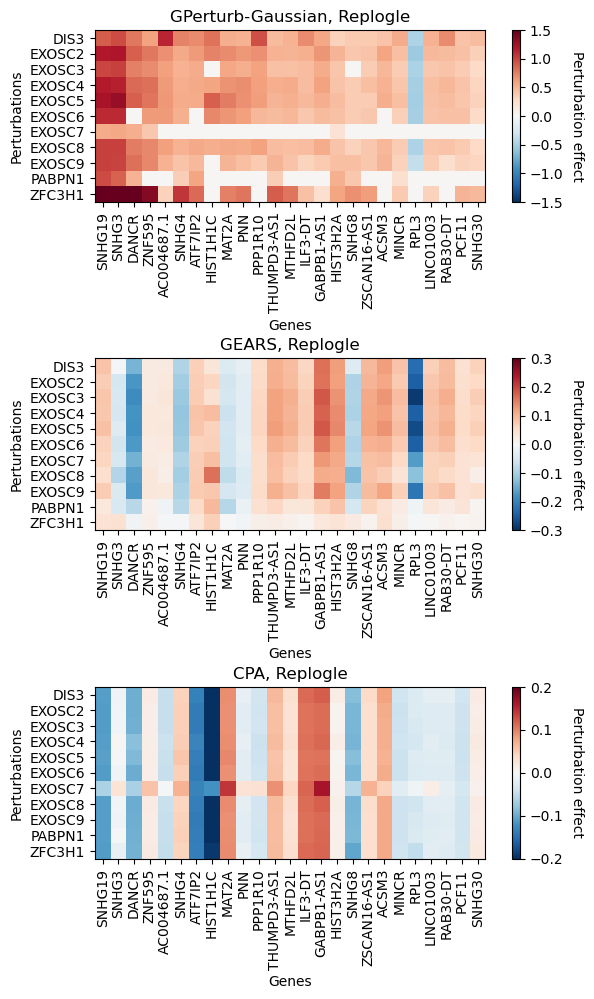

In [17]:
GEARS_pert = pd.read_csv('./GPerturb_vis_data/Rep_GEARS_subset.csv', index_col=0)
GPerturb_pert = pd.read_csv('./GPerturb_vis_data/Rep_GPerturb_Gaussian_subset.csv', index_col=0)
CPA_pert = pd.read_csv('./GPerturb_vis_data/CPA_Rep_isolated_pert.csv', index_col=0)

import matplotlib.colors as colors

fig2, axes2 = plt.subplots(3, 1)
negatives = -1.5
positives = 1.5 
num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

im = axes2[0].imshow(GPerturb_pert, cmap=cmap_2neg_4pos, vmin=negatives, vmax=positives)
axes2[0].set_xticks(np.arange(len(GPerturb_pert.columns)), GPerturb_pert.columns, rotation=90)
axes2[0].set_yticks(np.arange(len(GPerturb_pert.index)), GPerturb_pert.index)
axes2[0].set_ylabel('')
axes2[0].set_xlabel('Genes')
axes2[0].set_ylabel('Perturbations')
axes2[0].set_title('GPerturb-Gaussian, Replogle')
axes2[0].set_aspect('equal')
cbar = fig2.colorbar(im, ax=axes2[0], fraction=0.04)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Perturbation effect', rotation=270)


negatives = -0.3 
positives = 0.3 
num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

im = axes2[1].imshow(GEARS_pert, cmap=cmap_2neg_4pos, vmin=negatives, vmax=positives)
axes2[1].set_xticks(np.arange(len(GEARS_pert.columns)), GEARS_pert.columns, rotation=90)
axes2[1].set_yticks(np.arange(len(GEARS_pert.index)), GEARS_pert.index)
# axes2.set_xticks([])
# axes2.set_yticks([])
axes2[1].set_ylabel('')
axes2[1].set_xlabel('Genes')
axes2[1].set_ylabel('Perturbations')
axes2[1].set_title('GEARS, Replogle')
axes2[1].set_aspect('equal')
cbar = fig2.colorbar(im, ax=axes2[1], fraction=0.04)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Perturbation effect', rotation=270)


negatives = -0.2 
positives = 0.2 
num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

im = axes2[2].imshow(CPA_pert, cmap=cmap_2neg_4pos, vmin=negatives, vmax=positives)
axes2[2].set_xticks(np.arange(len(CPA_pert.columns)), CPA_pert.columns, rotation=90)
axes2[2].set_yticks(np.arange(len(CPA_pert.index)), CPA_pert.index)
# axes2.set_xticks([])
# axes2.set_yticks([])
axes2[2].set_ylabel('')
axes2[2].set_xlabel('Genes')
axes2[2].set_ylabel('Perturbations')
axes2[2].set_title('CPA, Replogle')
axes2[2].set_aspect('equal')
cbar = fig2.colorbar(im, ax=axes2[2], fraction=0.04)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Perturbation effect', rotation=270)

fig2.set_size_inches(7, 10)
fig2.tight_layout()
plt.savefig('rep_heatmap_exo_cont.png')
# plt.close()


# CPA dose-response curve given by log-sig and MLP models, reproducing Fig S5 from Lotfollahi et al 2023

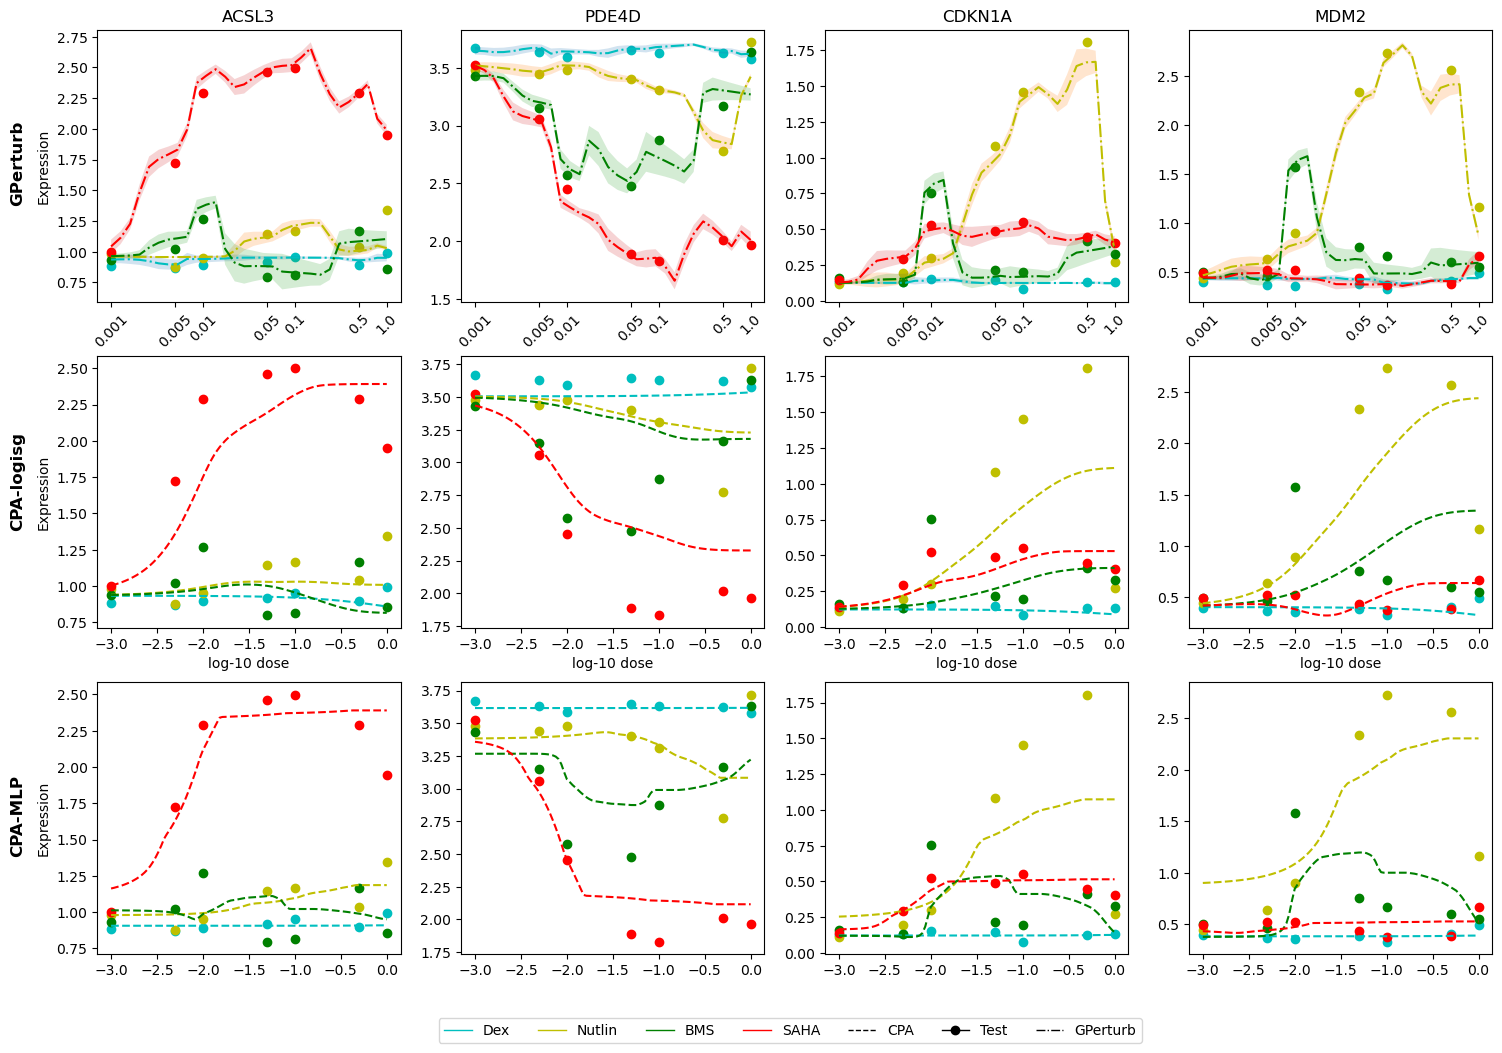

In [13]:
BSAPR_avg_pred = pd.read_csv('./GPerturb_vis_data/Sciplex2_BSAPR_avg_pred.csv', index_col=0)
obs_avg = pd.read_csv('./GPerturb_vis_data/Sciplex2_obs_avg.csv', index_col=0)
CPA_avg_pred_MLP = pd.read_csv('./GPerturb_vis_data/CPA_avg_pred_MLP.csv', index_col=0)
CPA_avg_pred = pd.read_csv('./GPerturb_vis_data/Sciplex2_CPA_avg_pred.csv', index_col=0)

degs = ['ACSL3', 'PDE4D', 'CDKN1A','MDM2']
f, a = plt.subplots(nrows=3, ncols=4)
for i in range(12):
    my_id = i%4
    my_data_CPA = CPA_avg_pred[CPA_avg_pred.gene==degs[my_id]]
    my_data_CPA_MLP = CPA_avg_pred_MLP[CPA_avg_pred.gene == degs[my_id]]
    my_data_obs = obs_avg[obs_avg.gene == degs[my_id]]
    my_data_BSAPR = BSAPR_avg_pred[BSAPR_avg_pred.gene == degs[my_id]]
    lty = ['--', '-', '-.']
    col = ['c', 'y', 'g', 'r']
    for idx, j in enumerate(['Dex', 'Nutlin', 'BMS', 'SAHA']):
        if i//4 == 2:
            a[i // 4, i%4].plot(np.linspace(-3, 0, 100), np.array(my_data_CPA_MLP[my_data_CPA_MLP.pert == j].sort_values(by='dose').CPA), linestyle=lty[0], label=j, c=col[idx])
            a[i // 4, i % 4].scatter(np.log10([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.]),
            np.array(my_data_obs[my_data_obs.pert == j].sort_values(by='dose').obs),
            marker='o', c=col[idx])
        elif i//4 == 1:
            a[i // 4, i%4].plot(np.linspace(-3, 0, 100), np.array(my_data_CPA[my_data_CPA.pert == j].sort_values(by='dose').CPA), linestyle=lty[0], label=j, c=col[idx])
            a[i // 4, i % 4].scatter(np.log10([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.]),
            np.array(my_data_obs[my_data_obs.pert == j].sort_values(by='dose').obs),
            marker='o', c=col[idx])
        else:
            a[i // 4, i % 4].scatter(np.log10([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.]), np.array(my_data_obs[my_data_obs.pert == j].sort_values(by='dose').obs), marker='o', c=col[idx])
            a[i // 4, i % 4].plot(np.linspace(-3, 0, 30),
            np.array(my_data_BSAPR[my_data_BSAPR.pert == j].sort_values(by='dose').BSAPR), linestyle=lty[2], c=col[idx])
            a[i // 4, i % 4].fill_between(np.linspace(-3, 0, 30),
            np.array(my_data_BSAPR[my_data_BSAPR.pert == j].sort_values(by='dose').BSAPR_lower),
            np.array(my_data_BSAPR[my_data_BSAPR.pert == j].sort_values(by='dose').BSAPR_upper), alpha=0.2)
            a[i // 4, i % 4].set_title(degs[i])
            
            a[i // 4, i % 4].set_xticks(ticks=np.log10([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.]), labels=[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], rotation=45)
    if i//4 == 1:
        a[i // 4, i % 4].set_xlabel('log-10 dose')
    else:
        a[i // 4, i % 4].set_xlabel('')
    if i%4 == 0:
        a[i // 4, i % 4].set_ylabel('Expression')
a[0, 0].text(-4.1, 1.40, 'GPerturb', rotation='vertical', fontsize=12, weight='demibold')
a[1, 0].text(-4.1, 1.40, 'CPA-logisg', rotation='vertical', fontsize=12, weight='demibold')
a[2, 0].text(-4.1, 1.40, 'CPA-MLP', rotation='vertical', fontsize=12, weight='demibold')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='c', lw=1, label='Dex'),
    Line2D([0], [0], color='y', lw=1, label='Nutlin'),
    Line2D([0], [0], color='g', lw=1, label='BMS'),
    Line2D([0], [0], color='r', lw=1, label='SAHA'),
    Line2D([0], [0], color='k', lw=1, linestyle='--', label='CPA'),
    Line2D([0], [0], color='k', lw=1, marker='o', label='Test'),
    Line2D([0], [0], color='k', lw=1, linestyle='-.', label='GPerturb')]

f.legend(handles=legend_elements, loc='lower center', ncol=7, bbox_to_anchor=(.51, 0.03))
f.set_size_inches(18, 12)
# plt.savefig('GPerturb_Sciplex2_curve_MLP_both.png', dpi=200)
# plt.close()

# Exosome related perturbation effects at different inclusion threholds, Replogle et al, GPerturb-ZIP

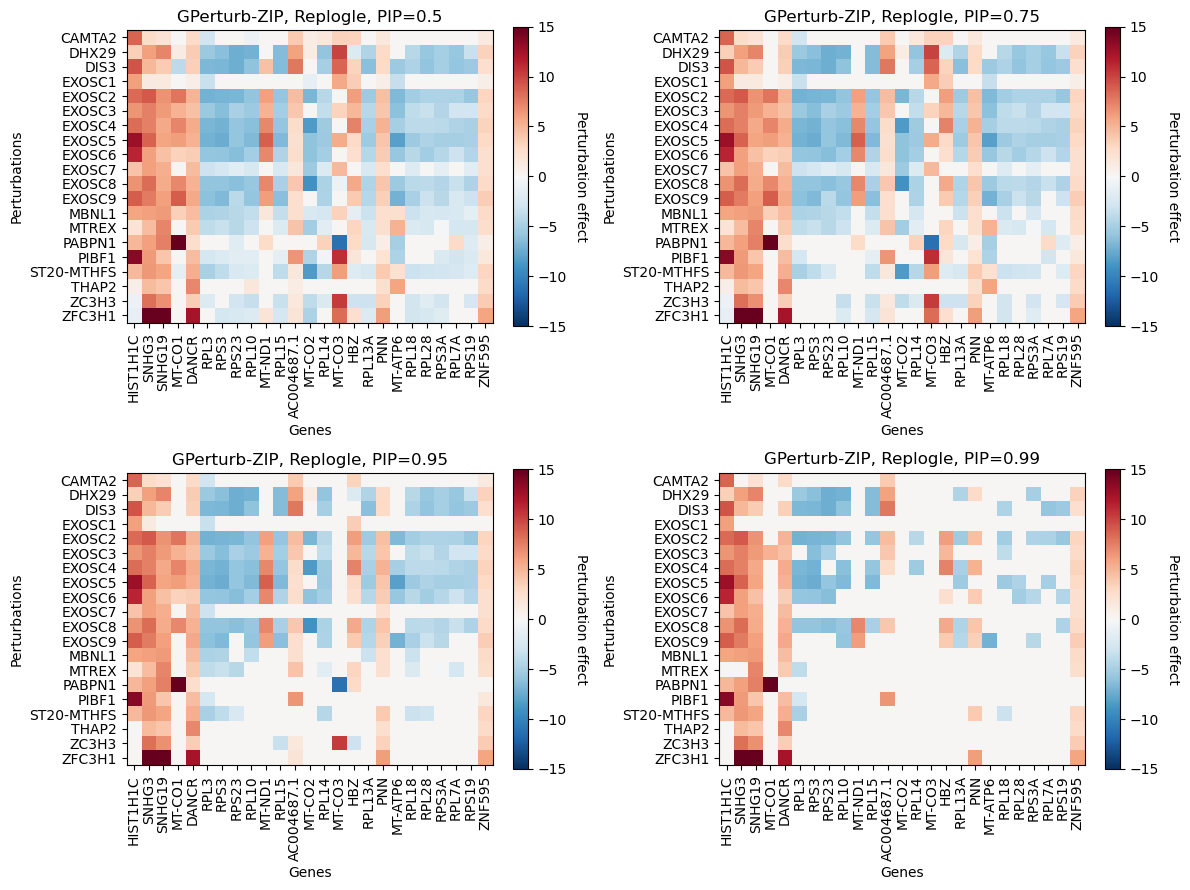

In [34]:
pert_50 = pd.read_csv('./GPerturb_vis_data/Rep_ZIP_EXO_50.csv', index_col=0)
pert_75 = pd.read_csv('./GPerturb_vis_data/Rep_ZIP_EXO_75.csv', index_col=0)
pert_95 = pd.read_csv('./GPerturb_vis_data/Rep_ZIP_EXO_95.csv', index_col=0)
pert_99 = pd.read_csv('./GPerturb_vis_data/Rep_ZIP_EXO_99.csv', index_col=0)

pert_50 = pert_50.sort_index()
pert_75 = pert_75.sort_index()
pert_95 = pert_95.sort_index()
pert_99 = pert_99.sort_index()

import matplotlib.colors as colors

fig2, axes2 = plt.subplots(2, 2)
negatives = -15
positives = 15
num_neg_colors = int(256 / (positives - negatives) * (-negatives))
num_pos_colors = 256 - num_neg_colors
cmap_BuRd = plt.cm.RdBu_r
colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
                   [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

precent = [0.5, 0.75, 0.95, 0.99]

for i, data in enumerate([pert_50, pert_75, pert_95, pert_99]):
    im = axes2[i//2, i%2].imshow(data, cmap=cmap_2neg_4pos, vmin=negatives, vmax=positives)
    axes2[i//2, i%2].set_xticks(np.arange(len(data.columns)), data.columns, rotation=90)
    axes2[i//2, i%2].set_yticks(np.arange(len(data.index)), data.index)
    axes2[i//2, i%2].set_ylabel('')
    axes2[i//2, i%2].set_xlabel('Genes')
    axes2[i//2, i%2].set_ylabel('Perturbations')
    axes2[i//2, i%2].set_title('GPerturb-ZIP, Replogle, PIP={}'.format(precent[i]))
    axes2[i//2, i%2].set_aspect('equal')
    cbar = fig2.colorbar(im, ax=axes2[i//2, i%2], fraction=0.04)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Perturbation effect', rotation=270)

fig2.set_size_inches(12, 9)
fig2.tight_layout()
plt.savefig('rep_heatmap_exo_threholds.png')
# plt.close()


# Scatter plot of estimated perturbation effects given by GEARS and GPerturb

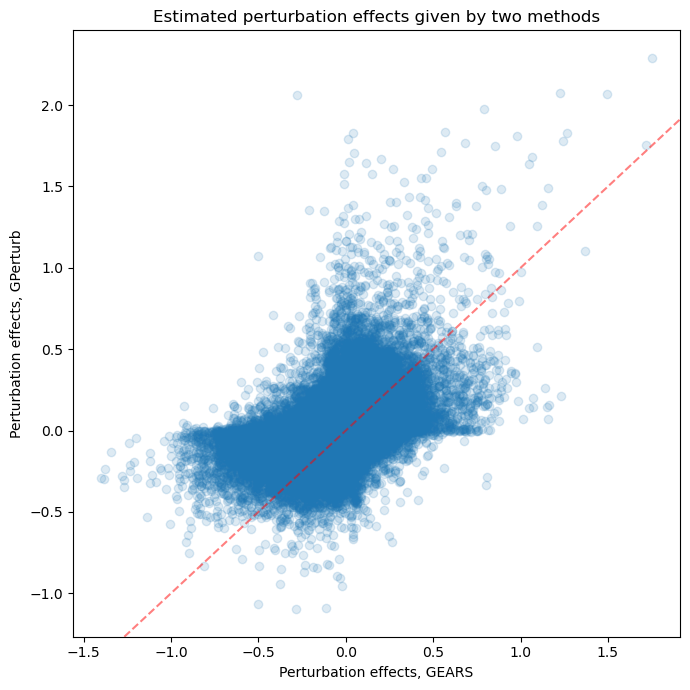

In [5]:
a = pd.read_csv('./GPerturb_vis_data/rep_GEARS_pred_alone.csv', index_col=0)
b = pd.read_csv('./GPerturb_vis_data/rep_avg_pred_Gaussian_alone.csv', index_col=0)

# align the genes and perturbations
a_pert = list(a.index)
b_pert = list(b.index)
inter_b = [_ in a_pert for _ in b_pert]
inter_a = [_ in b_pert for _ in a_pert]
a = a[inter_a]
b = b[inter_b]
a_pert = list(a.columns)
b_pert = list(b.columns)
inter_b = [_ in a_pert for _ in b_pert]
inter_a = [_ in b_pert for _ in a_pert]
a = a.iloc[:, inter_a]
b = b.iloc[:, inter_b]
a = a.sort_index()
b = b.sort_index()

# a, b are now aligned perturbation effects given by GEARS and GPerturb

fig, axes = plt.subplots(1, 1)
axes.scatter(a.to_numpy().ravel(), b.to_numpy().ravel(), alpha=0.15)
axes.axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axes.set_xlabel('Perturbation effects, GEARS')
axes.set_ylabel('Perturbation effects, GPerturb')
axes.set_title('Estimated perturbation effects given by two methods')
fig.set_size_inches(7, 7)
fig.tight_layout()
# plt.savefig('rep_GPerturb_vs_GEARS_pert.png')
# plt.close()

# Only retaining the top 10% largest perturbation effects

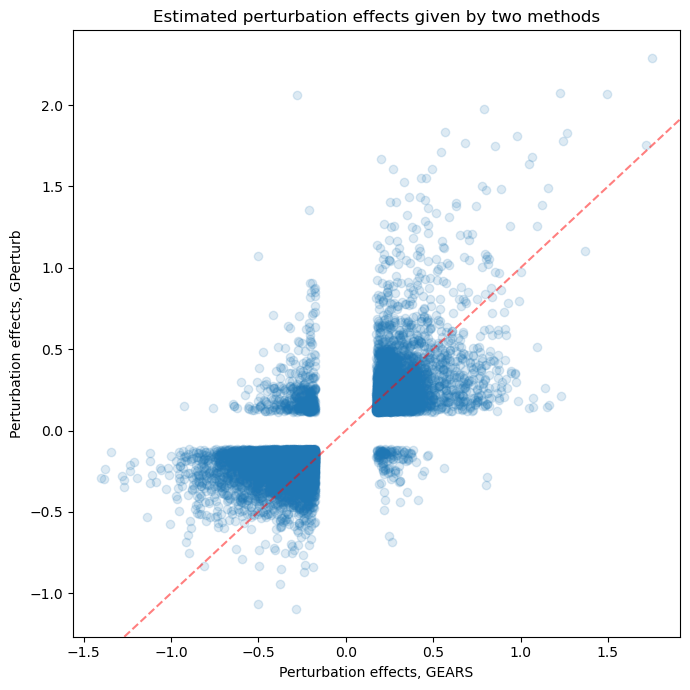

In [6]:
threshold_a = sorted(np.abs(a).to_numpy().ravel())[9*len(a.to_numpy().ravel())//10]
threshold_b = sorted(np.abs(b).to_numpy().ravel())[9*len(b.to_numpy().ravel())//10]

mask = np.logical_and(np.abs(a).to_numpy().ravel() > threshold_a, np.abs(b).to_numpy().ravel() > threshold_b)
# mask = np.abs(a).to_numpy().ravel() > threshold_a

fig, axes = plt.subplots(1, 1)
axes.scatter(a.to_numpy().ravel()[mask], b.to_numpy().ravel()[mask], alpha=0.15)
axes.axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axes.set_xlabel('Perturbation effects, GEARS')
axes.set_ylabel('Perturbation effects, GPerturb')
axes.set_title('Estimated perturbation effects given by two methods')
fig.set_size_inches(7, 7)
fig.tight_layout()
# plt.savefig('rep_GPerturb_vs_GEARS_pert_filtered.png')
# plt.close()

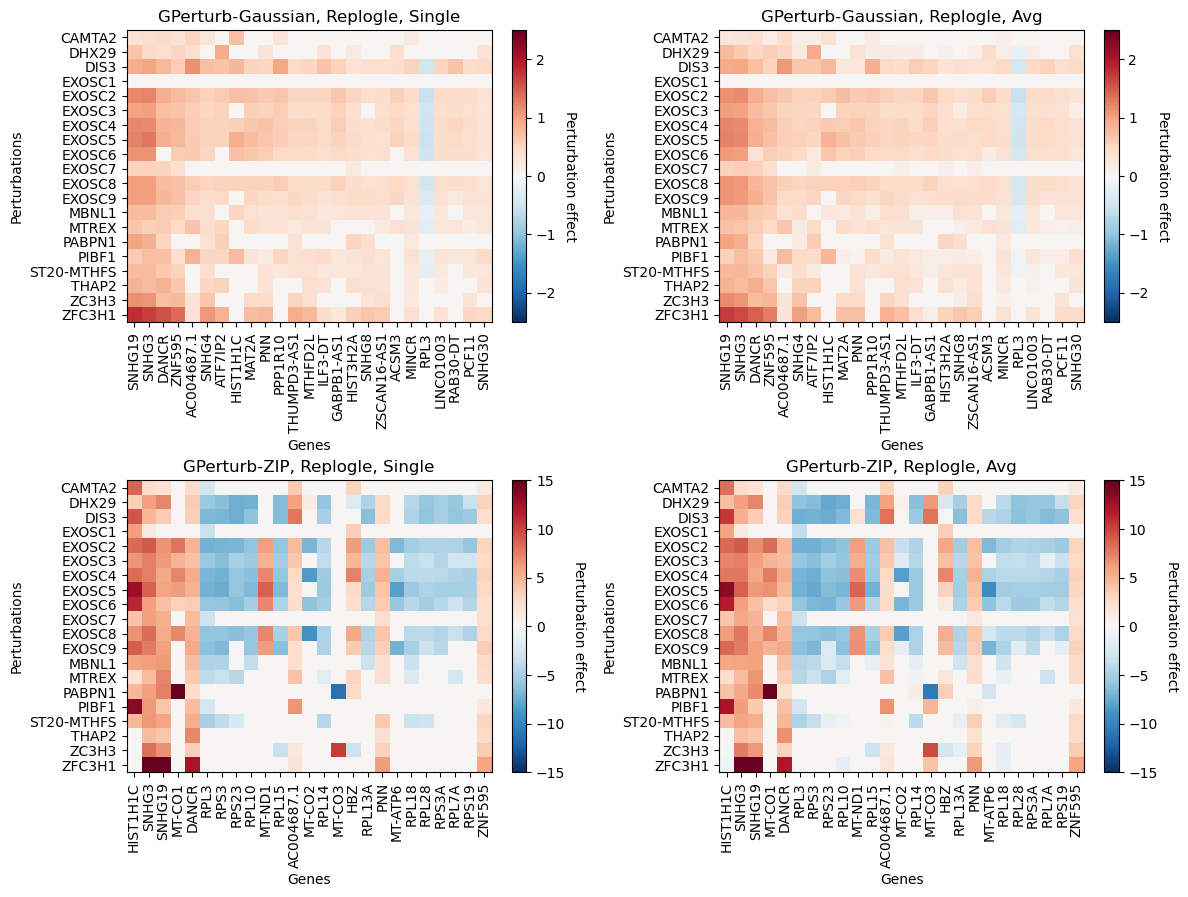

In [19]:
# Gaussian_2 = pd.read_csv('Rep_Gaussian_EXO_2.csv', index_col=0)
# Gaussian_1 = pd.read_csv('Rep_Gaussian_EXO.csv')
# Gaussian_1.index = list(Gaussian_2.index)
# Gaussian_1.columns = list(Gaussian_2.columns)
# ZIP_1 = pd.read_csv('Rep_ZIP_EXO.csv')
# ZIP_2 = pd.read_csv('Rep_ZIP_EXO_2.csv', index_col=0)
# ZIP_1.index = list(ZIP_2.index)
# ZIP_1.columns = list(ZIP_2.columns)

# ZIP_1 = ZIP_1.sort_index()
# ZIP_2 = ZIP_2.sort_index()
# Gaussian_1 = Gaussian_1.sort_index()
# Gaussian_2 = Gaussian_2.sort_index()

# import matplotlib.colors as colors



# fig2, axes2 = plt.subplots(2, 2)
# title = ['GPerturb-Gaussian, Replogle, Single', 'GPerturb-Gaussian, Replogle, Avg', 
#         'GPerturb-ZIP, Replogle, Single', 'GPerturb-ZIP, Replogle, Avg']
# pos = [2.5, 2.5, 15, 15]
# neg = [-2.5, -2.5, -15, -15]
# for i, data in enumerate([Gaussian_1, 0.5*(Gaussian_1+Gaussian_2), ZIP_1, 0.5*(ZIP_1+ZIP_2)]):
#     negatives = neg[i]
#     positives = pos[i]
#     num_neg_colors = int(256 / (positives - negatives) * (-negatives))
#     num_pos_colors = 256 - num_neg_colors
#     cmap_BuRd = plt.cm.RdBu_r
#     colors_2neg_4pos = [cmap_BuRd(0.5*c/num_neg_colors) for c in range(num_neg_colors)] +\
#                        [cmap_BuRd(1-0.5*c/num_pos_colors) for c in range(num_pos_colors)][::-1]
#     cmap_2neg_4pos = colors.LinearSegmentedColormap.from_list('cmap_2neg_4pos', colors_2neg_4pos, N=256)

#     im = axes2[i//2, i%2].imshow(data, cmap=cmap_2neg_4pos, vmin=negatives, vmax=positives)
#     axes2[i//2, i%2].set_xticks(np.arange(len(data.columns)), data.columns, rotation=90)
#     axes2[i//2, i%2].set_yticks(np.arange(len(data.index)), data.index)
#     axes2[i//2, i%2].set_ylabel('')
#     axes2[i//2, i%2].set_xlabel('Genes')
#     axes2[i//2, i%2].set_ylabel('Perturbations')
#     axes2[i//2, i%2].set_title(title[i])
#     axes2[i//2, i%2].set_aspect('equal')
#     cbar = fig2.colorbar(im, ax=axes2[i//2, i%2], fraction=0.04)
#     cbar.ax.get_yaxis().labelpad = 15
#     cbar.ax.set_ylabel('Perturbation effect', rotation=270)

# fig2.set_size_inches(12, 9)
# fig2.tight_layout()
# plt.savefig('rep_heatmap_exo_single_vs_rep.png')

# Scatter plot of estimated perturbation effects given by SAMS-VAE and GPerturb on Replogle et al dataset

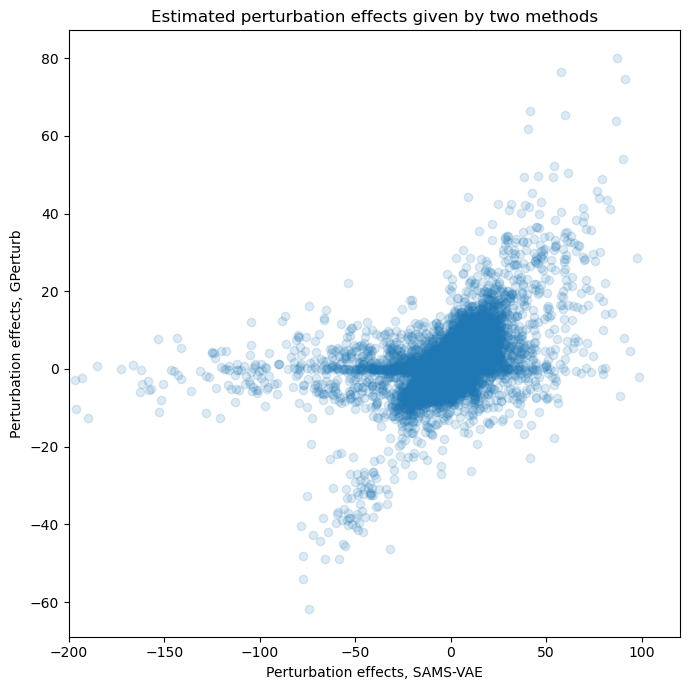

In [36]:
a = pd.read_csv('./GPerturb_vis_data/rep_SAMS_VAE_treatment_effects.csv', index_col=0)
b = pd.read_csv('./GPerturb_vis_data/rep_GPerturb_ZIP_treatment.csv', index_col=0)

# align the genes and perturbations
a_pert = list(a.index)
b_pert = list(b.index)
inter_b = [_ in a_pert for _ in b_pert]
inter_a = [_ in b_pert for _ in a_pert]
a = a[inter_a]
b = b[inter_b]
a_pert = list(a.columns)
b_pert = list(b.columns)
inter_b = [_ in a_pert for _ in b_pert]
inter_a = [_ in b_pert for _ in a_pert]
a = a.iloc[:, inter_a]
b = b.iloc[:, inter_b]
a = a.sort_index()
b = b.sort_index()

# a, b are now aligned perturbation effects given by GEARS and GPerturb

fig, axes = plt.subplots(1, 1)
axes.scatter(a.to_numpy().ravel(), b.to_numpy().ravel(), alpha=0.15)
axes.set_xlabel('Perturbation effects, SAMS-VAE')
axes.set_ylabel('Perturbation effects, GPerturb')
axes.set_title('Estimated perturbation effects given by two methods')
axes.set_xlim((-200, 120))
fig.set_size_inches(7, 7)
fig.tight_layout()
plt.savefig('rep_GPerturb_vs_SAMS-VAE_pert.png')
# plt.close()

# Scatter plot of estimated perturbation effects given by GPerturb-ZIP and SAMS-VAE on Norman dataset

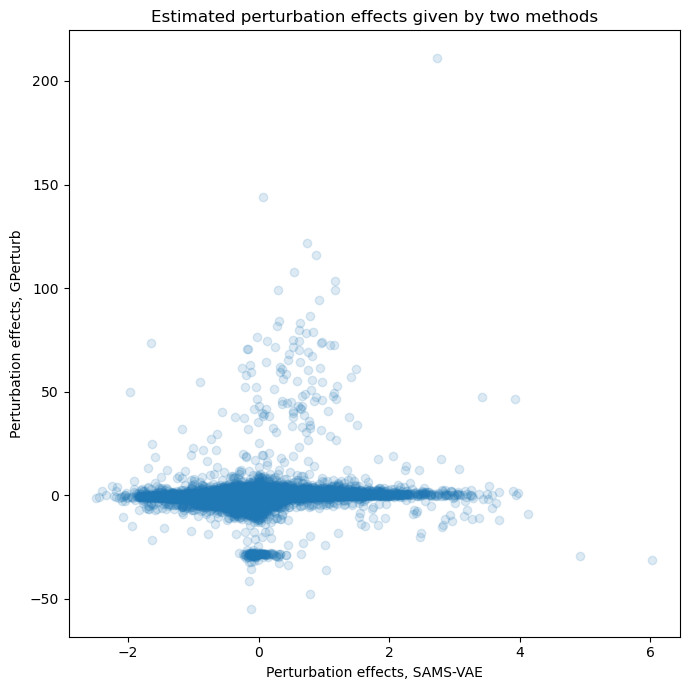

In [37]:
a = pd.read_csv('./GPerturb_vis_data/Norman_SAMS_VAE_treatment_effects.csv', index_col=0)
b = pd.read_csv('./GPerturb_vis_data/Norman_GPerturb_ZIP_treatment_effects.csv', index_col=0)

# align the genes and perturbations
a_pert = list(a.index)
b_pert = list(b.index)
inter_b = [_ in a_pert for _ in b_pert]
inter_a = [_ in b_pert for _ in a_pert]
a = a[inter_a]
b = b[inter_b]
a_pert = list(a.columns)
b_pert = list(b.columns)
inter_b = [_ in a_pert for _ in b_pert]
inter_a = [_ in b_pert for _ in a_pert]
a = a.iloc[:, inter_a]
b = b.iloc[:, inter_b]
a = a.sort_index()
b = b.sort_index()

# a, b are now aligned perturbation effects given by GEARS and GPerturb

fig, axes = plt.subplots(1, 1)
axes.scatter(a.to_numpy().ravel(), b.to_numpy().ravel(), alpha=0.15)
axes.set_xlabel('Perturbation effects, SAMS-VAE')
axes.set_ylabel('Perturbation effects, GPerturb')
axes.set_title('Estimated perturbation effects given by two methods')
fig.set_size_inches(7, 7)
fig.tight_layout()
plt.savefig('Norman_GPerturb_ZIP_vs_SAMS-VAE_pert.png')
# plt.close()

# GPerturb ZIP vs SAMS-VAE on Norman et al dataset

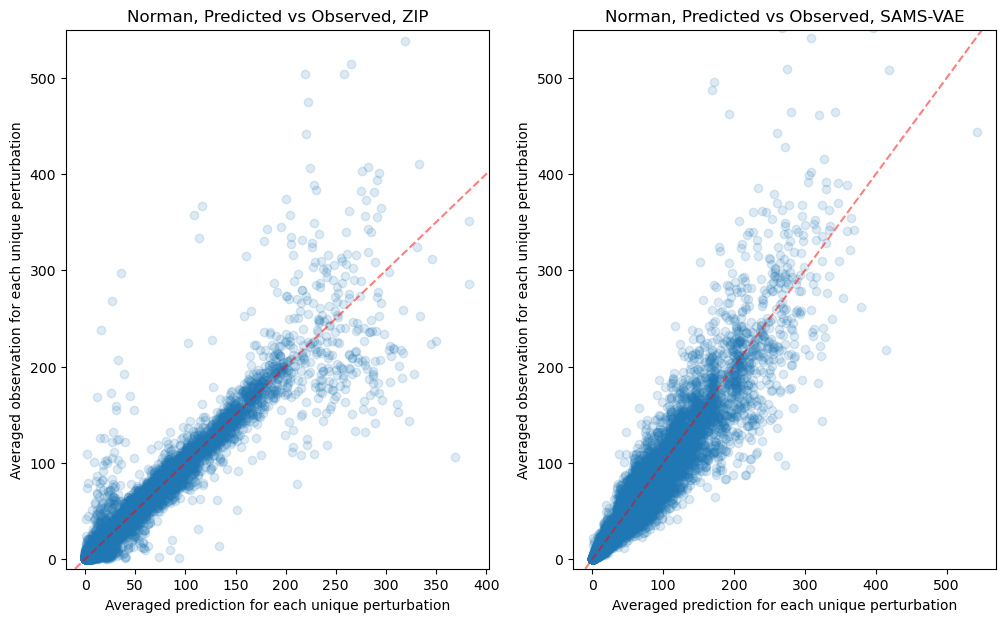

In [38]:
# finding averaged predictions for each of the unique perturbation

# avg_pred = np.zeros((len(np.unique(cond_list)), adata.X.shape[1]))
# avg_obs = np.zeros((len(np.unique(cond_list)), adata.X.shape[1]))
# for i, _ in enumerate(np.unique(cond_list)):
#     if i%10 == 0:
#         print(i)
#     my_id = np.arange(len(cond_list))[_ == np.array(cond_list)]
#     my_id = list(set(testing_idx) & set(my_id))
#     if len(my_id) != 0:
#         predicted_mu_mean, predicted_mu_var, predicted_base_mean, logit_p, logit_p_log_var = parametric_model(
#             my_conditioner[my_id], my_cell_info[my_id])
#         estimated_base_mean = predicted_base_mean  # * zeros[testing_idx].numpy()
#         estimated_perturbed_mean = (F.sigmoid(logit_p) * predicted_mu_mean)
#         avg_pred[i] = logexpp1(estimated_perturbed_mean + estimated_base_mean).detach().cpu().numpy().mean(0)
#         avg_obs[i] = my_observation[my_id].mean(0).numpy()

# loading from the precomputed

fig, axes = plt.subplots(1, 2)

avg_pred = np.loadtxt('./GPerturb_vis_data/norman_avg_pred_GPerturb_zip.csv').ravel()
avg_obs = np.loadtxt('./GPerturb_vis_data/norman_avg_obs_GPerturb_zip.csv').ravel()
avg_pred = avg_pred[avg_obs != 0]
avg_obs = avg_obs[avg_obs != 0]
axes[0].scatter(avg_pred, avg_obs, alpha=0.15)
axes[0].axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axes[0].set_xlabel('Averaged prediction for each unique perturbation')
axes[0].set_ylabel('Averaged observation for each unique perturbation')
axes[0].set_title('Norman, Predicted vs Observed, ZIP')
axes[0].set_ylim(-10, 550)

avg_pred = pd.read_csv('./GPerturb_vis_data/Norman_SAMS_VAE_pred.csv', index_col=0).to_numpy().ravel()
avg_obs = pd.read_csv('./GPerturb_vis_data/Norman_SAMS_VAE_obs.csv', index_col=0).to_numpy().ravel()
avg_pred = avg_pred[avg_obs != 0]
avg_obs = avg_obs[avg_obs != 0]
axes[1].scatter(avg_pred, avg_obs, alpha=0.15)
axes[1].axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axes[1].set_xlabel('Averaged prediction for each unique perturbation')
axes[1].set_ylabel('Averaged observation for each unique perturbation')
axes[1].set_title('Norman, Predicted vs Observed, SAMS-VAE')
axes[1].set_ylim(-10, 550)

fig.set_size_inches(12, 7)
plt.savefig('Norman_GPerturb_ZIP_vs_SAMS-VAE.png')

# Scatter plot of estimated perturbation effects given by GPerturb-ZIGP and SAMS-VAE on Norman dataset

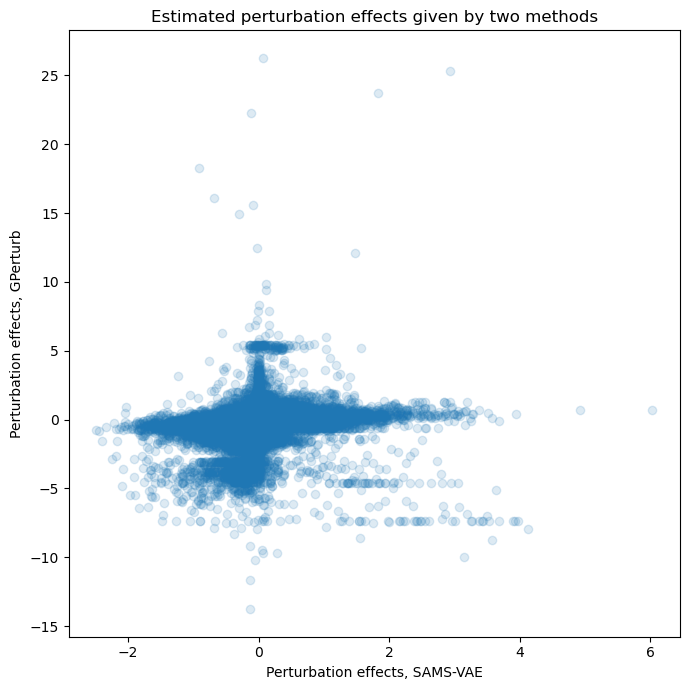

In [39]:
a = pd.read_csv('./GPerturb_vis_data/Norman_SAMS_VAE_treatment_effects.csv', index_col=0)
b = pd.read_csv('./GPerturb_vis_data/Norman_GPerturb_ZIGP_treatment_effects.csv', index_col=0)

# align the genes and perturbations
a_pert = list(a.index)
b_pert = list(b.index)
inter_b = [_ in a_pert for _ in b_pert]
inter_a = [_ in b_pert for _ in a_pert]
a = a[inter_a]
b = b[inter_b]
a_pert = list(a.columns)
b_pert = list(b.columns)
inter_b = [_ in a_pert for _ in b_pert]
inter_a = [_ in b_pert for _ in a_pert]
a = a.iloc[:, inter_a]
b = b.iloc[:, inter_b]
a = a.sort_index()
b = b.sort_index()

# a, b are now aligned perturbation effects given by GEARS and GPerturb

fig, axes = plt.subplots(1, 1)
axes.scatter(a.to_numpy().ravel(), b.to_numpy().ravel(), alpha=0.15)
axes.set_xlabel('Perturbation effects, SAMS-VAE')
axes.set_ylabel('Perturbation effects, GPerturb')
axes.set_title('Estimated perturbation effects given by two methods')
fig.set_size_inches(7, 7)
fig.tight_layout()
plt.savefig('Norman_GPerturb_ZIGP_vs_SAMS-VAE_pert.png')
# plt.close()

# GPerturb ZIGP vs SAMS-VAE on Norman et al dataset

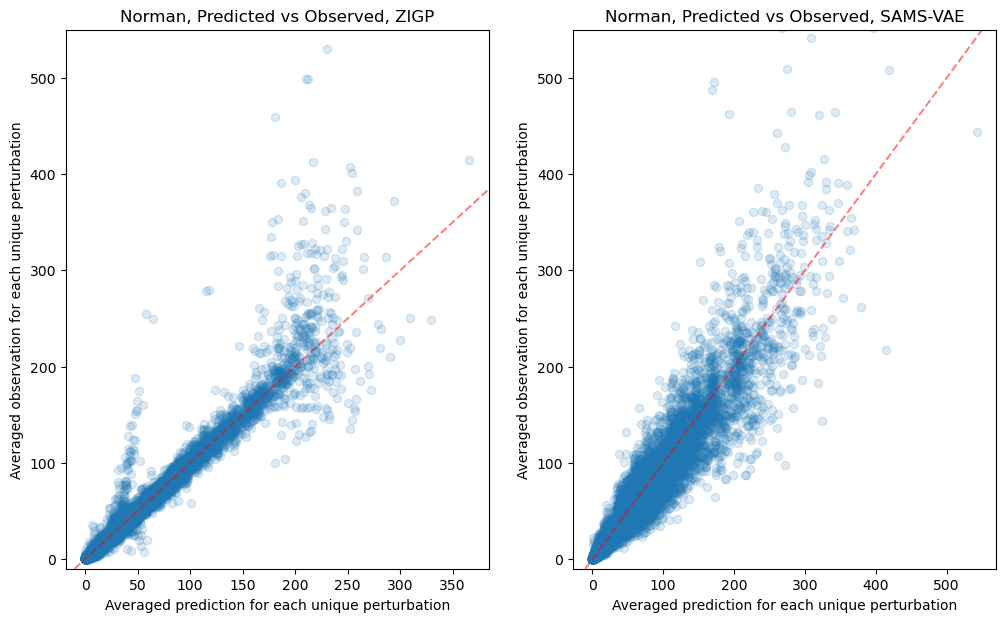

In [40]:
# finding averaged predictions for each of the unique perturbation

# avg_pred = np.zeros((len(np.unique(cond_list)), adata.X.shape[1]))
# avg_obs = np.zeros((len(np.unique(cond_list)), adata.X.shape[1]))
# for i, _ in enumerate(np.unique(cond_list)):
#     if i%10 == 0:
#         print(i)
#     my_id = np.arange(len(cond_list))[_ == np.array(cond_list)]
#     my_id = list(set(testing_idx) & set(my_id))
#     if len(my_id) != 0:
#         predicted_mu_mean, predicted_mu_var, predicted_base_mean, logit_p, logit_p_log_var = parametric_model(
#             my_conditioner[my_id], my_cell_info[my_id])
#         estimated_base_mean = predicted_base_mean  # * zeros[testing_idx].numpy()
#         estimated_perturbed_mean = (F.sigmoid(logit_p) * predicted_mu_mean)
#         avg_pred[i] = logexpp1(estimated_perturbed_mean + estimated_base_mean).detach().cpu().numpy().mean(0)
#         avg_obs[i] = my_observation[my_id].mean(0).numpy()

# loading from the precomputed

fig, axes = plt.subplots(1, 2)

avg_pred = np.loadtxt('./GPerturb_vis_data/norman_avg_pred_GPerturb_zinb.csv').ravel()
avg_obs = np.loadtxt('./GPerturb_vis_data/norman_avg_obs_GPerturb_zinb.csv').ravel()
avg_pred = avg_pred[avg_obs != 0]
avg_obs = avg_obs[avg_obs != 0]
axes[0].scatter(avg_pred, avg_obs, alpha=0.15)
axes[0].axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axes[0].set_xlabel('Averaged prediction for each unique perturbation')
axes[0].set_ylabel('Averaged observation for each unique perturbation')
axes[0].set_title('Norman, Predicted vs Observed, ZIGP')
axes[0].set_ylim(-10, 550)

avg_pred = pd.read_csv('./GPerturb_vis_data/Norman_SAMS_VAE_pred.csv', index_col=0).to_numpy().ravel()
avg_obs = pd.read_csv('./GPerturb_vis_data/Norman_SAMS_VAE_obs.csv', index_col=0).to_numpy().ravel()
avg_pred = avg_pred[avg_obs != 0]
avg_obs = avg_obs[avg_obs != 0]
axes[1].scatter(avg_pred, avg_obs, alpha=0.15)
axes[1].axline((1, 1), slope=1, c='r', alpha=0.5, linestyle='--')
axes[1].set_xlabel('Averaged prediction for each unique perturbation')
axes[1].set_ylabel('Averaged observation for each unique perturbation')
axes[1].set_title('Norman, Predicted vs Observed, SAMS-VAE')
axes[1].set_ylim(-10, 550)

fig.set_size_inches(12, 7)
plt.savefig('Norman_GPerturb_ZIGP_vs_SAMS-VAE.png')

# Perturbation effects, GEARS vs CPA, Replogle dataset

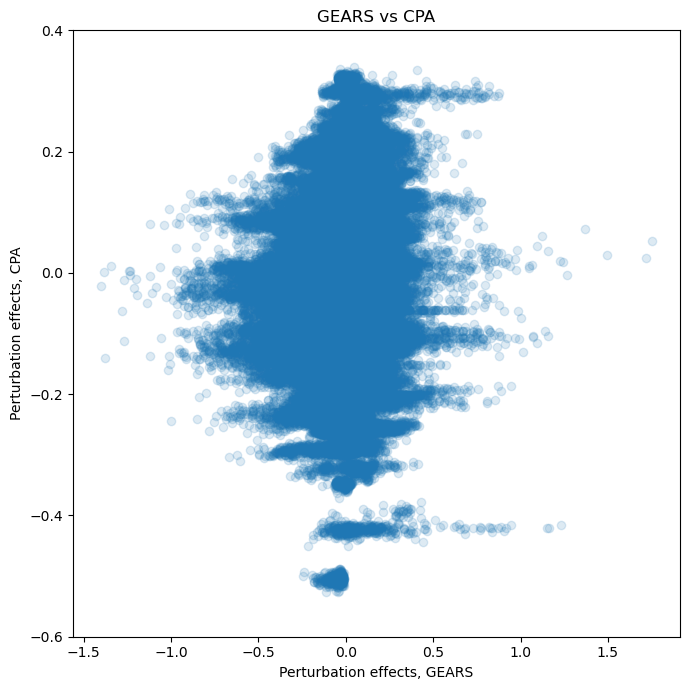

In [10]:
a = pd.read_csv('./GPerturb_vis_data/rep_CPA_pert_effects.csv', index_col=0)
b = pd.read_csv('./GPerturb_vis_data/rep_GEARS_pred_alone.csv', index_col=0)

intersection_pert = sorted(list(set(a.index).intersection(b.index)))

a = a.loc[intersection_pert]
b = b.loc[intersection_pert]
a = a[~a.index.duplicated(keep='first')]


intersection_col = sorted(list(set(a.columns).intersection(b.columns)))
a = a[intersection_col]
b = b[intersection_col]

# a, b, c are now aligned perturbation effects given by GEARS and GPerturb
fig, axes = plt.subplots(1, 1)
axes.scatter(b.to_numpy().ravel(), a.to_numpy().ravel(), alpha=0.15)
axes.set_xlabel('Perturbation effects, GEARS')
axes.set_ylabel('Perturbation effects, CPA')
axes.set_title('GEARS vs CPA')
axes.set_ylim((-0.6, 0.4))
fig.set_size_inches(7, 7)
fig.tight_layout()
plt.savefig('rep_CPA_vs_GEARS_pert.png')

# Perturbation effects, GEARS vs CPA, Norman dataset

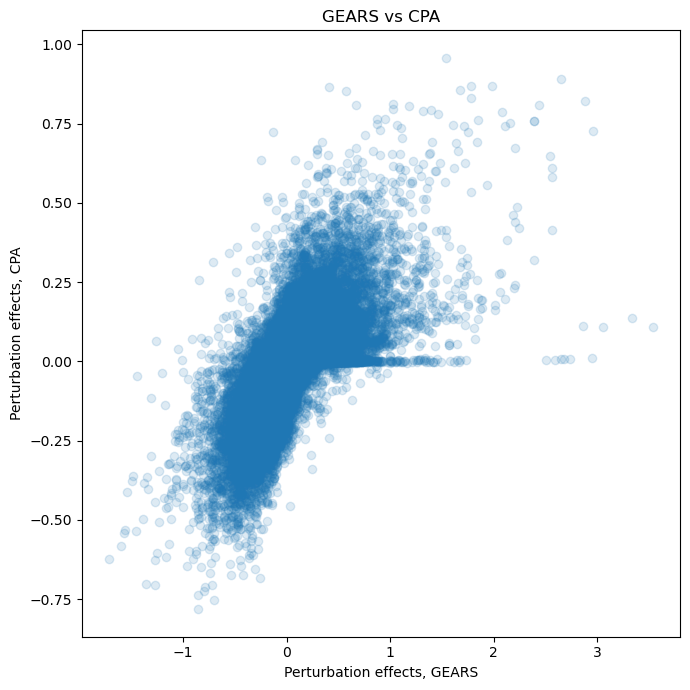

In [11]:
a = pd.read_csv('./GPerturb_vis_data/Norman_CPA_pert_effects.csv', index_col=0)
b = pd.read_csv('./GPerturb_vis_data/Norman_GEARS_pred_alone.csv', index_col=0)

intersection_pert = sorted(list(set(a.index).intersection(b.index)))
a = a.loc[intersection_pert]
b = b.loc[intersection_pert]
a = a[~a.index.duplicated(keep='first')]
intersection_col = sorted(list(set(a.columns).intersection(b.columns)))
a = a[intersection_col]
b = b[intersection_col]

# a, b are now aligned perturbation effects given by GEARS and GPerturb
fig, axes = plt.subplots(1, 1)
axes.scatter(b.to_numpy().ravel(), a.to_numpy().ravel(), alpha=0.15)
axes.set_xlabel('Perturbation effects, GEARS')
axes.set_ylabel('Perturbation effects, CPA')
axes.set_title('GEARS vs CPA')
fig.set_size_inches(7, 7)
fig.tight_layout()
plt.savefig('Norman_CPA_vs_GEARS_pert.png')